In [29]:
install.packages("ggplot2")
install.packages("ellipse")
library("ellipse")
library("ggplot2")


The downloaded binary packages are in
	/var/folders/zf/z_5ht60d3n7gfsmz14cjq6fc0000gn/T//RtmpwshkPn/downloaded_packages

The downloaded binary packages are in
	/var/folders/zf/z_5ht60d3n7gfsmz14cjq6fc0000gn/T//RtmpwshkPn/downloaded_packages


In [30]:
# Problem 2
A <- matrix(c(3, -1, -1, 3), nrow = 2, byrow = TRUE)
eigen_A <- eigen(A)
lambda <- eigen_A$values
P <- eigen_A$vectors
cat("Eigenvalues:",lambda)
cat("\nEigenvectors (columns of P):\n")
print(P)
# 2.1
cat("\n2.1")
print(all.equal(t(P), solve(P)))
# 2.2
cat("\n2.2")
print(all.equal(det(A), prod(eigen_A$values)))
# 2.3
cat("\n2.3")
print(all.equal(det(A), det(diag(eigen_A$values))))
# 2.4
cat("\n2.4 find the inverse matrix\n")
A_inv <- P %*% diag(1/lambda) %*% t(P)
print(A_inv)
# 2.5 
cat("\n2.5")
print(all.equal(A_inv, P %*% diag(1/lambda) %*% t(P)))


Eigenvalues: 4 2
Eigenvectors (columns of P):


           [,1]       [,2]
[1,] -0.7071068 -0.7071068
[2,]  0.7071068 -0.7071068

2.1[1] TRUE

2.2[1] TRUE

2.3[1] TRUE

2.4 find the inverse matrix
      [,1]  [,2]
[1,] 0.375 0.125
[2,] 0.125 0.375

2.5[1] TRUE


In [31]:
# problem 3.3
mu = c(3343, 49.8)
sigma = matrix(c(528**2, 0.75*528*2.5, 0.75*528*2.5, 2.5**2), nrow=2)
e = eigen(sigma); e

eigen() decomposition
$values
[1] 2.787875e+05 2.734341e+00

$vectors
             [,1]         [,2]
[1,] -0.999993695  0.003551149
[2,] -0.003551149 -0.999993695


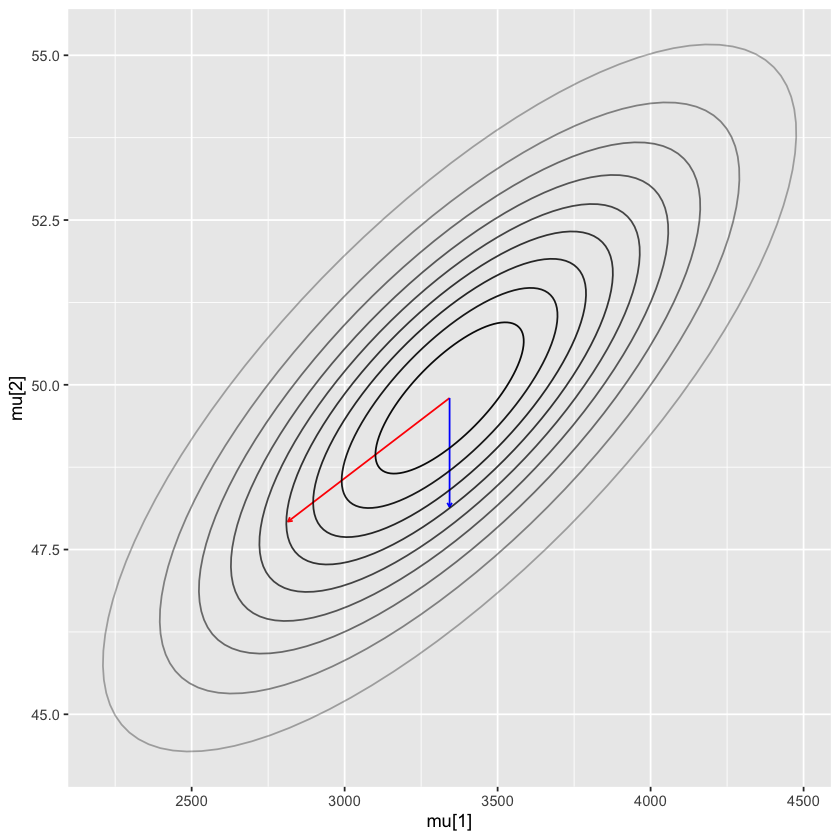

In [32]:
# problem 3.3
diago <- eigen(sigma)
vectors <- diago$vectors %*% diag(sqrt(diago$values)) + mu
arrow.size <- 0.1

plot <- ggplot() + geom_path() +
  geom_segment(aes(x = mu[1], y = mu[2], xend = vectors[1, 1], yend = vectors[2, 1]), 
               arrow = arrow(length = unit(arrow.size, 'cm')), color = "red") +
  geom_segment(aes(x = mu[1], y = mu[2], xend = vectors[1, 2], yend = vectors[2, 2]), 
               arrow = arrow(length = unit(arrow.size, 'cm')), color = "blue")
  
for (level in seq(0, 1, 0.1)) {
  ellipse_data <- ellipse(x = sigma, centre = mu, level = level)
  plot <- plot + geom_path(data = ellipse_data, aes(x, y), color = "black", alpha = sqrt(1 - level))
}
plot


In [33]:
cat("mean = ", 49.8 + 0.75*2.5/528*(4025 - 3343))
cat("\nvar = ", ((2.5**2) * (1-0.75**2)))

mean =  52.22187
var =  2.734375

# Project

In [1]:
# Project Part one 
data = read.table("WeightLength.txt", header = TRUE, sep = "\t")
head(data,n=5)

,Weight,Length
,<dbl>,<dbl>
1,3676.9,51.6
2,2828.1,48.2
3,3853.5,51.8
4,3815.3,51.3
5,3558.8,50.3


In [2]:
# p1.1
mean_weight = mean(data$Weight)
mean_length = mean(data$Length)
cov = cov(data$Weight, data$Length)
cat("mean weight:",mean_weight)
cat("\nmean length:",mean_length)
cat("\ncovariance:",cov)

mean weight: 3233.545
mean length: 49.23764
covariance: 915.2955

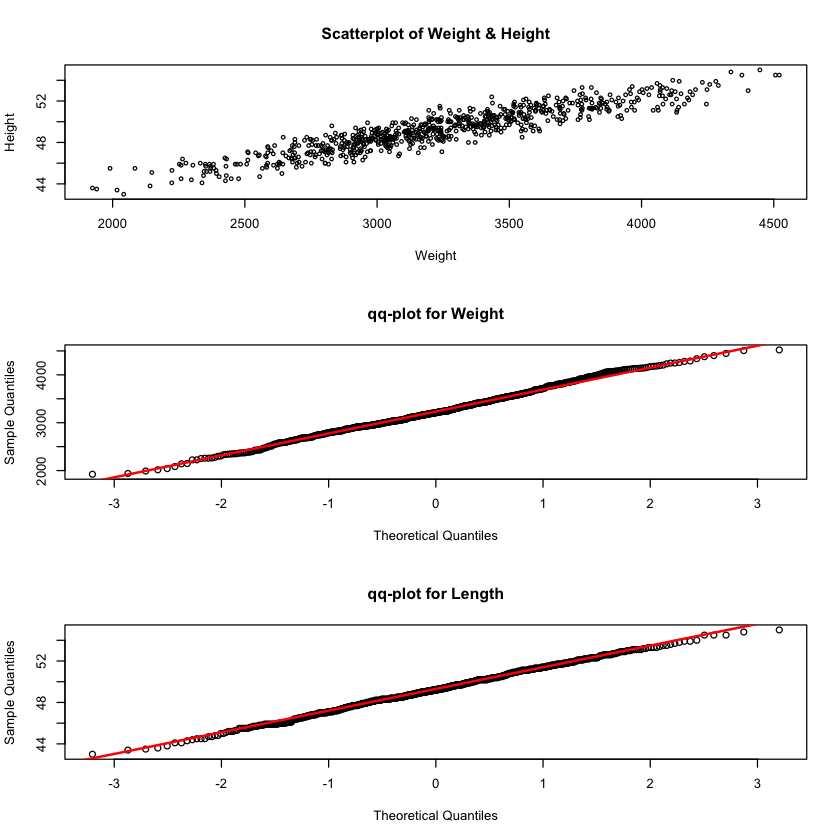

In [12]:
# p1.2
colnames(data) <- c("Weight", "Length")
par(ask=TRUE, mfrow=c(3, 1), bg="white")
plot(data$Weight, data$Length, xlab="Weight", ylab="Height", main="Scatterplot of Weight & Height", bg="white", cex=0.6)

qqnorm(data$Weight, main="qq-plot for Weight", cex=1)
qqline(data$Weight, col = 'red', , lwd = 2)
qqnorm(data$Length, main="qq-plot for Length", cex=1)
qqline(data$Length, col = 'red', , lwd = 2)


    Weight     Length 
3233.54511   49.23764 
            [,1]       [,2]
[1,] 220276.6577 915.295511
[2,]    915.2955   4.443303


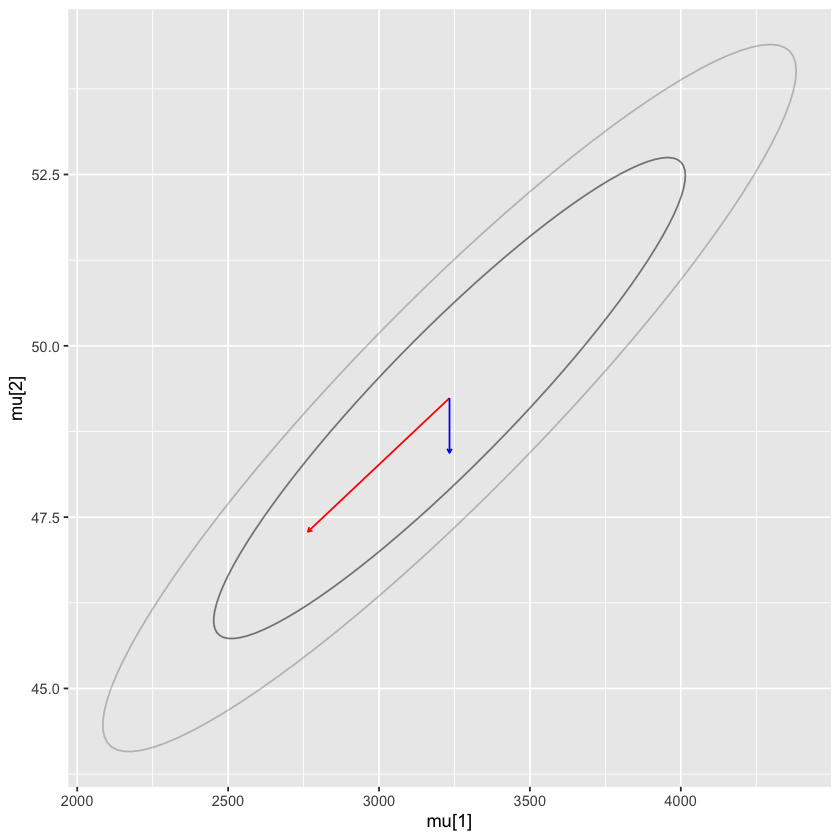

In [37]:
# p1.3
sigma <- matrix(cov(data),nrow=2)
mu <- colMeans(data)
print(mu)
print(sigma)

diago <- eigen(sigma)
vectors <- diago$vectors %*% diag(sqrt(diago$values)) + mu
arrow.size <- 0.1

plot <- ggplot() + geom_path() +
  geom_segment(aes(x = mu[1], y = mu[2], xend = vectors[1, 1], yend = vectors[2, 1]), 
               arrow = arrow(length = unit(arrow.size, 'cm')), color = "red") +
  geom_segment(aes(x = mu[1], y = mu[2], xend = vectors[1, 2], yend = vectors[2, 2]), 
               arrow = arrow(length = unit(arrow.size, 'cm')), color = "blue")
  
ellipse_data_75 <- ellipse(x = sigma, centre = mu, level = 0.75)
ellipse_data_95 <- ellipse(x = sigma, centre = mu, level = 0.95)

plot <- plot + 
  geom_path(data = as.data.frame(ellipse_data_75), aes(x, y), color = "black", alpha = sqrt(1 - 0.75)) +
  geom_path(data = as.data.frame(ellipse_data_95), aes(x, y), color = "black", alpha = sqrt(1 - 0.95))

plot

In [38]:
# P1.4
centralized_data <- sweep(data, MARGIN = 2, colMeans(data), FUN = "-")
centralized_matrix <- as.matrix(centralized_data)
children_c2 <- rowSums((centralized_matrix %*% solve(cov(data))) * centralized_matrix)

in_outer_ellipse <- children_c2 <= qchisq(0.95, df=2)
in_inner_ellipse <- children_c2 <= qchisq(0.75, df=2)
children_labels <- as.integer(in_outer_ellipse & !in_inner_ellipse) + 2 * as.integer(in_inner_ellipse) +1
labels <- c("Score_0", "Score_1", "Score_2")
children_labels <- labels[children_labels]
table(children_labels)


children_labels
Score_0 Score_1 Score_2 
     38     157     541 

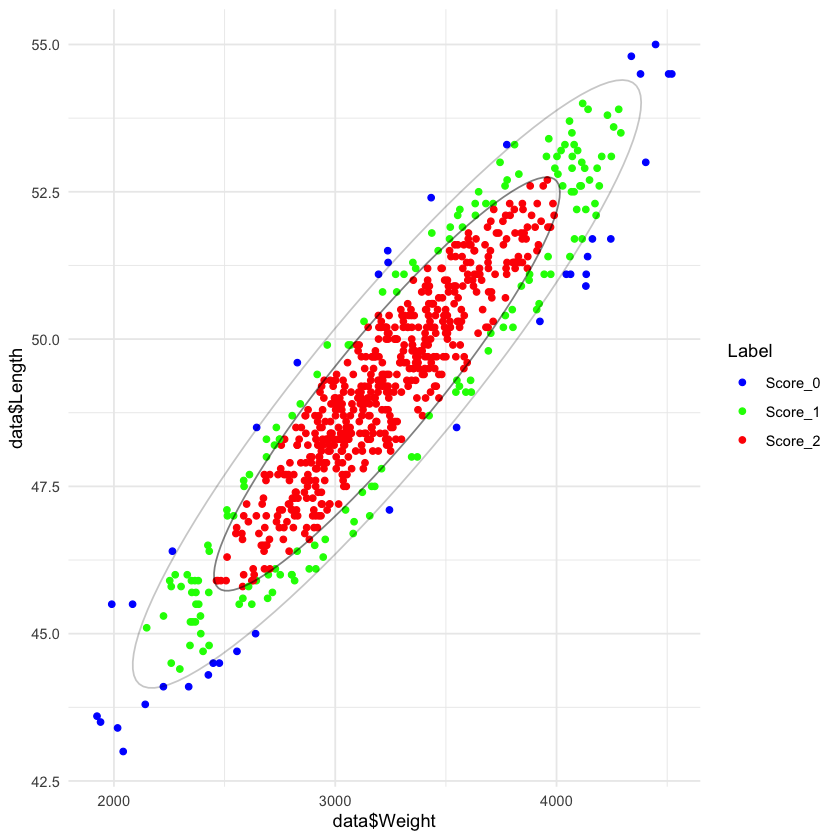

In [39]:
df <- data.frame(centralized_data)
df$labels <- children_labels

plot <- ggplot(df, aes(x = data$Weight, y = data$Length, color = labels)) +
  geom_point() +
  scale_color_manual(values = c("Score_0" = "blue", "Score_1" = "green", "Score_2" = "red")) +
  labs(color = "Label") +
  theme_minimal()

  ellipse_data_75 <- ellipse(x = sigma, center = mu, level = 0.75)
  ellipse_data_95 <- ellipse(x = sigma, center = mu, level = 0.95)
plot <- plot + 
  geom_path(data = as.data.frame(ellipse_data_75), aes(x, y), color = "black", alpha = sqrt(1 - 0.75)) +
  geom_path(data = as.data.frame(ellipse_data_95), aes(x, y), color = "black", alpha = sqrt(1 - 0.95))
plot

In [40]:
# p1.5
s_d <- eigen(sigma)
print("Eigenvectors:")
print(s_d$vectors)
print("Eigenvalues:")
print(s_d$values)

[1] "Eigenvectors:"
             [,1]         [,2]
[1,] -0.999991367  0.004155185
[2,] -0.004155185 -0.999991367
[1] "Eigenvalues:"


[1] 2.202805e+05 6.400477e-01


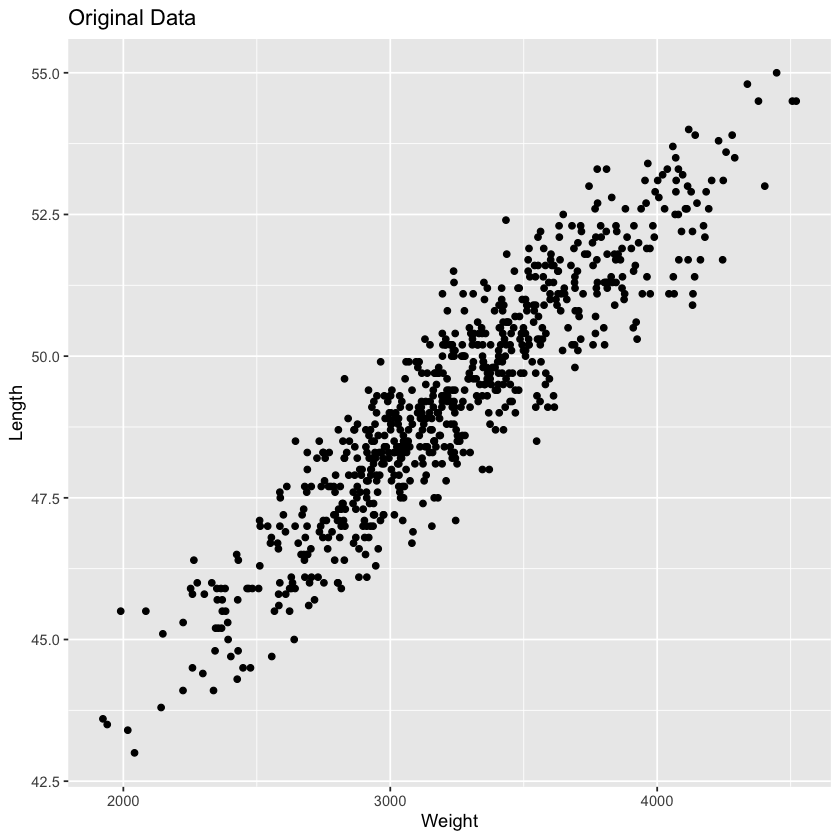

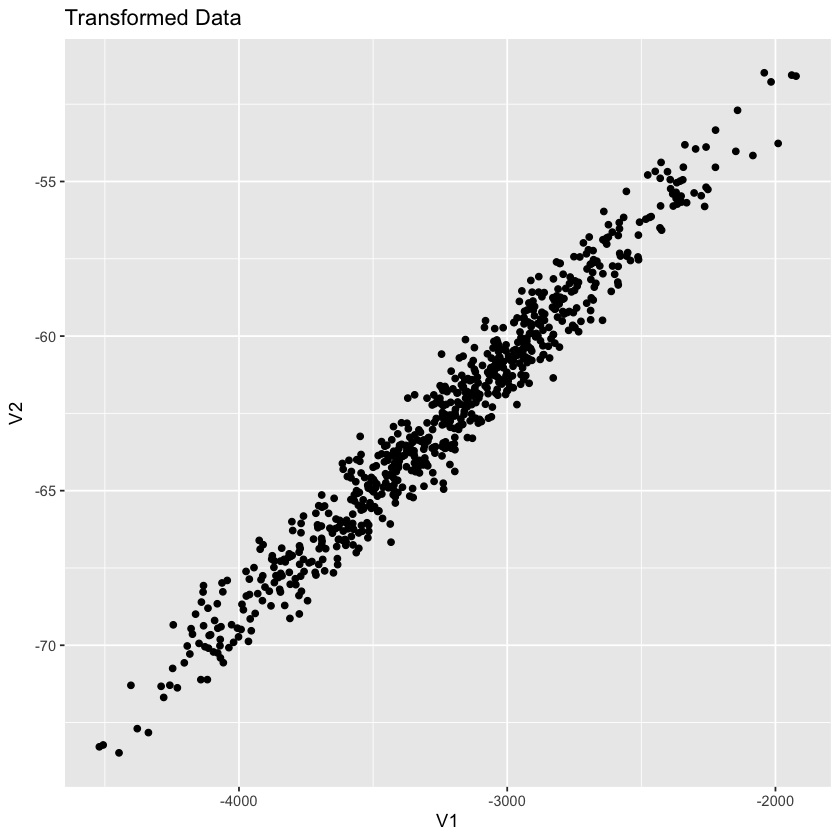

In [41]:
# p1.6
ggplot(data, aes(x=Weight, y=Length)) + geom_point() +ggtitle("Original Data")
ggplot(as.data.frame(as.matrix(data) %*% t(eigen(sigma)$vectors)), aes(x = V1, y = V2)) + 
  geom_point() +
  ggtitle("Transformed Data")


In [42]:
# P2
data = read.table("ParentsWeightLength.txt", header = TRUE, sep = "\t")
head(data,n=2)

,FatherHeight,MotherHeight,Weight,Length
,<dbl>,<dbl>,<dbl>,<dbl>
1,176.7,172.8,3676.9,51.6
2,175.1,164.0,2828.1,48.2


In [43]:
# p2.1

father_height <- data$FatherHeight
mother_height <- data$MotherHeight
weight <- data$Weight
length <- data$Length

mean_values <- colMeans(data[, c("FatherHeight", "MotherHeight", "Weight", "Length")], na.rm = TRUE)
cov_matrix <- cov(data[, c("FatherHeight", "MotherHeight", "Weight", "Length")])

print("Mean values:")
print(mean_values)

print("Covariance matrix:")
print(cov_matrix)


[1] "Mean values:"
FatherHeight MotherHeight       Weight       Length 
   177.41603    166.91957   3233.54511     49.23764 
[1] "Covariance matrix:"
             FatherHeight MotherHeight      Weight     Length
FatherHeight   12.6120963    0.6310056    931.8590   3.289545
MotherHeight    0.6310056    9.7721065    827.2878   2.852147
Weight        931.8589629  827.2877829 220276.6577 915.295511
Length          3.2895454    2.8521470    915.2955   4.443303


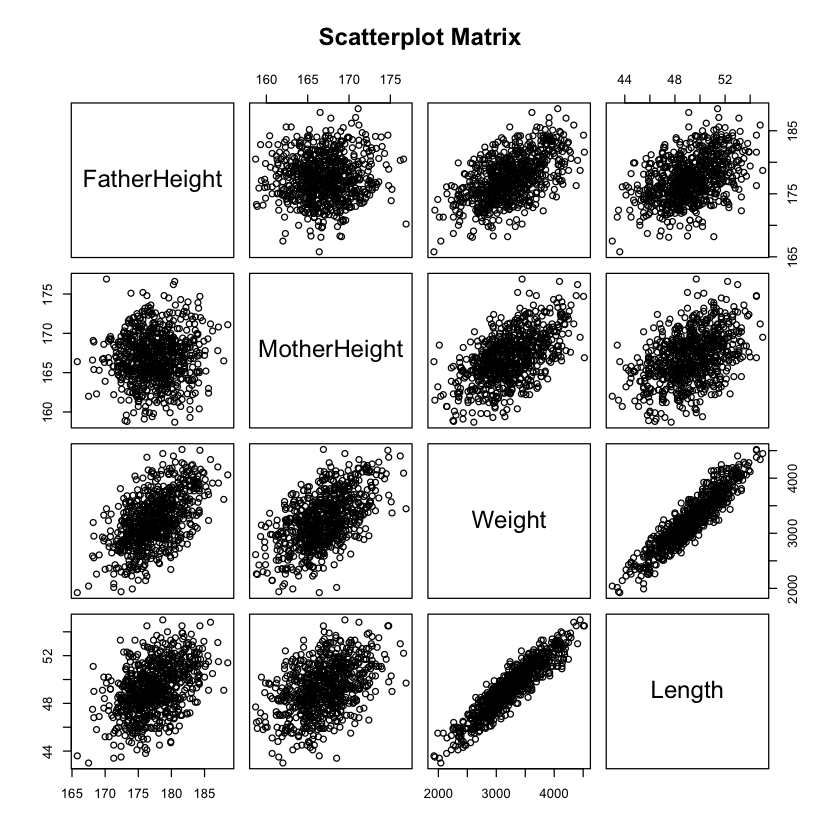

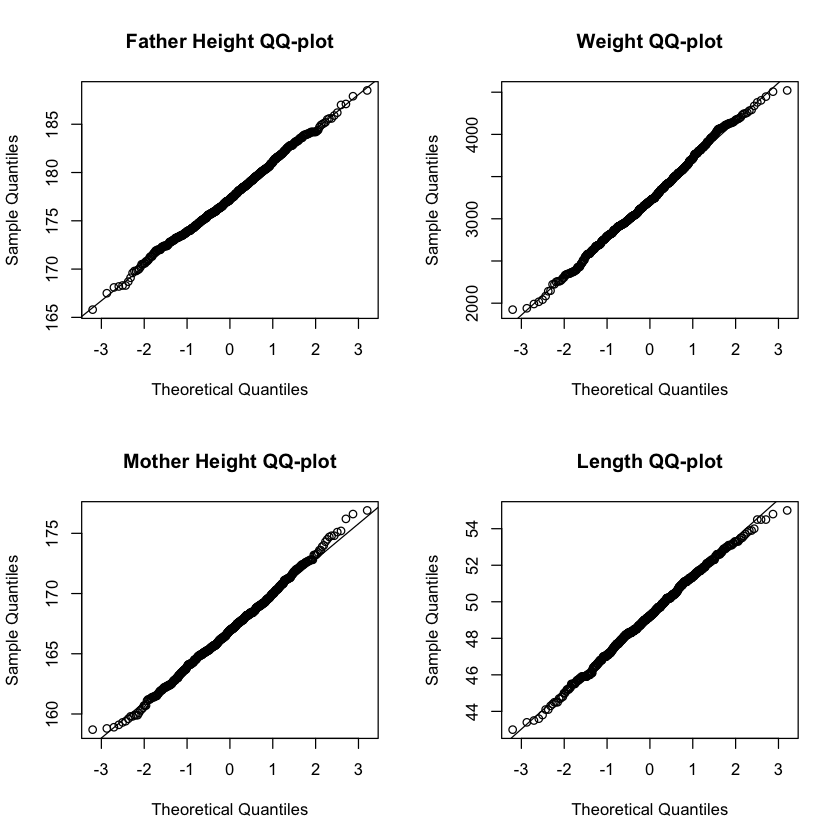

In [44]:
# P2.2
par(mfrow = c(2, 2),bg="white")
pairs(data[, c("FatherHeight", "MotherHeight", "Weight", "Length")], 
      main = "Scatterplot Matrix")
qqnorm(father_height, main = "Father Height QQ-plot")
qqline(father_height)

qqnorm(mother_height, main = "Mother Height QQ-plot")
qqline(mother_height)

qqnorm(weight, main = "Weight QQ-plot")
qqline(weight)

qqnorm(length, main = "Length QQ-plot")
qqline(length)

In [45]:
indices <- c("Weight", "Length", "FatherHeight", "MotherHeight")

conditional_cov_matrix <- cov_matrix[indices[1:2], indices[1:2]] - cov_matrix[indices[1:2], indices[3:4]] %*% solve(cov_matrix[indices[3:4], indices[3:4]]) %*% t(cov_matrix[indices[1:2], indices[3:4]])

print("Conditional Covariance Matrix:")
print(conditional_cov_matrix)

unconditional_cov_matrix <- cov(data[, c("Weight", "Length")])
print("Unconditional Covariance Matrix:")
print(unconditional_cov_matrix)


[1] "Conditional Covariance Matrix:"
           Weight     Length
Weight 88857.9955 456.846078
Length   456.8461   2.843767


[1] "Unconditional Covariance Matrix:"
            Weight     Length
Weight 220276.6577 915.295511
Length    915.2955   4.443303


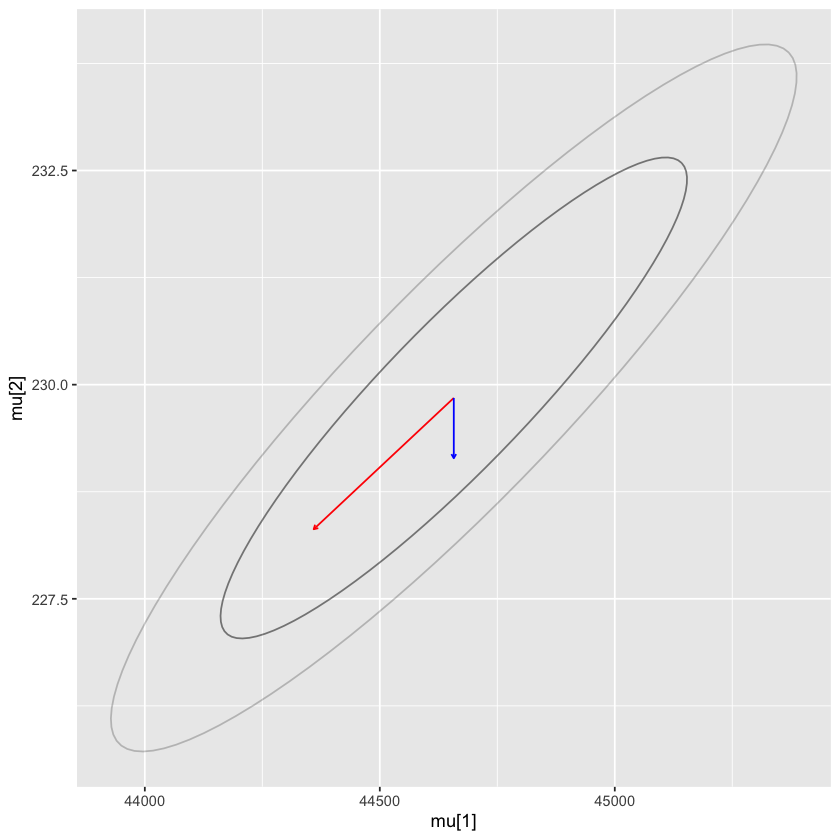

In [46]:
sigma <- matrix(conditional_cov_matrix,nrow=2)
mu <- colMeans(conditional_cov_matrix)

diago <- eigen(sigma)
vectors <- diago$vectors %*% diag(sqrt(diago$values)) + mu
arrow.size <- 0.1

plot <- ggplot() + geom_path() +
  geom_segment(aes(x = mu[1], y = mu[2], xend = vectors[1, 1], yend = vectors[2, 1]), 
               arrow = arrow(length = unit(arrow.size, 'cm')), color = "red") +
  geom_segment(aes(x = mu[1], y = mu[2], xend = vectors[1, 2], yend = vectors[2, 2]), 
               arrow = arrow(length = unit(arrow.size, 'cm')), color = "blue")
  
ellipse_data_75 <- ellipse(x = sigma, centre = mu, level = 0.75)
ellipse_data_95 <- ellipse(x = sigma, centre = mu, level = 0.95)

plot <- plot + 
  geom_path(data = as.data.frame(ellipse_data_75), aes(x, y), color = "black", alpha = sqrt(1 - 0.75)) +
  geom_path(data = as.data.frame(ellipse_data_95), aes(x, y), color = "black", alpha = sqrt(1 - 0.95))

plot

In [47]:
# p2.5
centralized_data <- sweep(data[, c("Weight", "Length")], MARGIN = 2, colMeans(data[, c("Weight", "Length")]), FUN = "-")
centralized_matrix <- as.matrix(centralized_data)
children_c2 <- rowSums((centralized_matrix %*% solve(conditional_cov_matrix)) * centralized_matrix)

children_c2_in_outer_ellipse <- children_c2 <= qchisq(0.95, df = 2)
children_c2_in_inner_ellipse <- children_c2 <= qchisq(0.75, df = 2)

children_labels <- as.integer(children_c2_in_outer_ellipse & !children_c2_in_inner_ellipse) + 
  2 * as.integer(children_c2_in_inner_ellipse) + 1
labels <- c("Score_0", "Score_1", "Score_2")

children_labels <- labels[children_labels]
table(children_labels)


children_labels
Score_0 Score_1 Score_2 
    176     169     391 

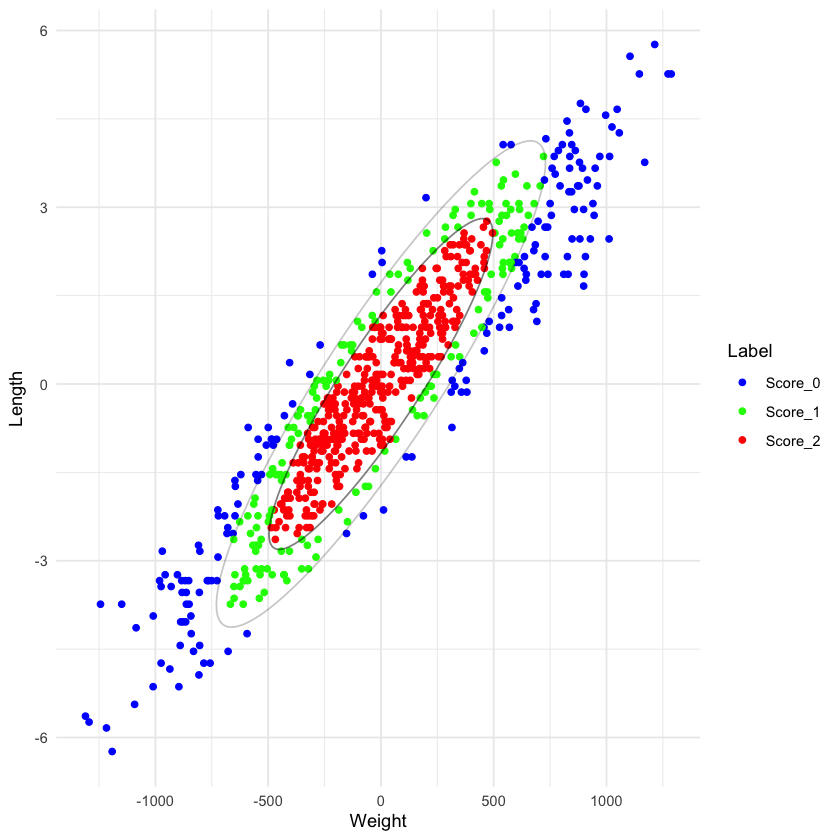

In [48]:
df <- data.frame(centralized_data)
df$labels <- children_labels
sigma <- matrix(conditional_cov_matrix,nrow=2)
mu <- colMeans(df[, c("Weight", "Length")])
plot <- ggplot(df, aes(x = Weight, y = Length, color = labels)) +
  geom_point() +
  scale_color_manual(values = c("Score_0" = "blue", "Score_1" = "green", "Score_2" = "red")) +
  labs(color = "Label") +
  theme_minimal()

ellipse_data_75 <- ellipse(x = sigma, centre = mu, level = 0.75)
ellipse_data_95 <- ellipse(x = sigma, centre = mu, level = 0.95)
plot <- plot + 
  geom_path(data = as.data.frame(ellipse_data_75), aes(x, y), color = "black", alpha = sqrt(0.25)) +
  geom_path(data = as.data.frame(ellipse_data_95), aes(x, y), color = "black", alpha = sqrt(0.05))

plot

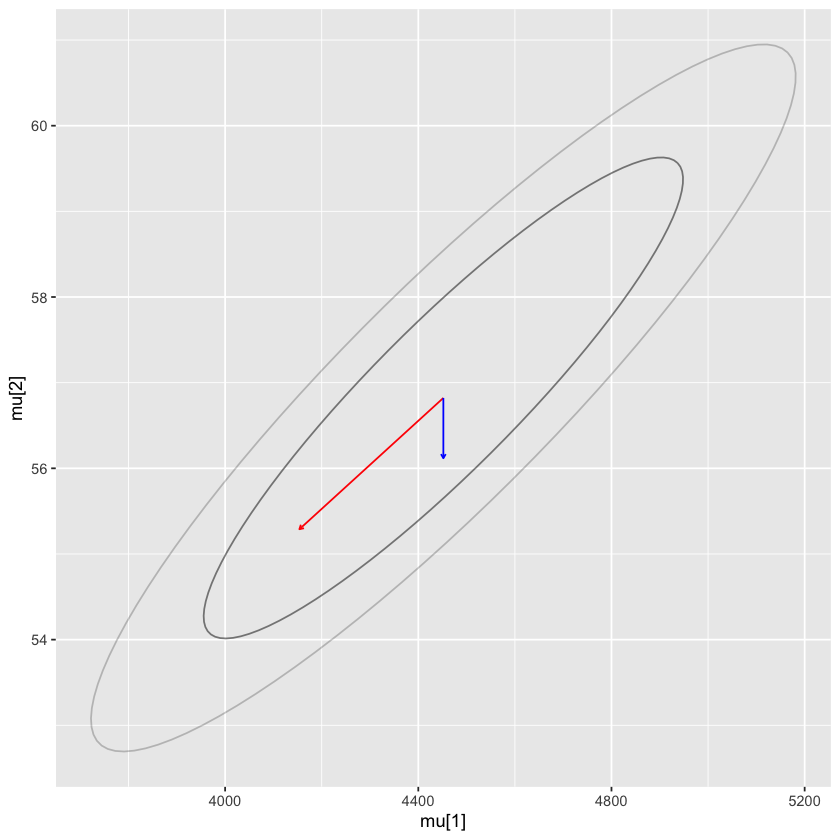

In [49]:
# p2.6
mu_FM <- colMeans(data[, c("FatherHeight", "MotherHeight")])
mu_WL <- colMeans(data[, c("Weight", "Length")])
mu <- as.matrix(mu_WL + sigma[1:2, 2] %*% solve(sigma[2, 2]) %*% (c(185, 178) - mu_FM))[1:2]

diago <- eigen(sigma)
vectors <- diago$vectors %*% diag(sqrt(diago$values)) + mu
arrow.size <- 0.1

plot <- ggplot() + geom_path() +
  geom_segment(aes(x = mu[1], y = mu[2], xend = vectors[1, 1], yend = vectors[2, 1]), 
               arrow = arrow(length = unit(arrow.size, 'cm')), color = "red") +
  geom_segment(aes(x = mu[1], y = mu[2], xend = vectors[1, 2], yend = vectors[2, 2]), 
               arrow = arrow(length = unit(arrow.size, 'cm')), color = "blue")
  
ellipse_data_75 <- ellipse(x = sigma, centre = mu, level = 0.75)
ellipse_data_95 <- ellipse(x = sigma, centre = mu, level = 0.95)

plot <- plot + 
  geom_path(data = as.data.frame(ellipse_data_75), aes(x, y), color = "black", alpha = sqrt(1 - 0.75)) +
  geom_path(data = as.data.frame(ellipse_data_95), aes(x, y), color = "black", alpha = sqrt(1 - 0.95))

plot

In [50]:
# p2.7
s_d <- eigen(sigma)
print("Eigenvectors:")
print(s_d$vectors)
print("Eigenvalues:")
print(s_d$values)

[1] "Eigenvectors:"
             [,1]         [,2]
[1,] -0.999986784  0.005141266
[2,] -0.005141266 -0.999986784


[1] "Eigenvalues:"
[1] 88860.344276     0.494969


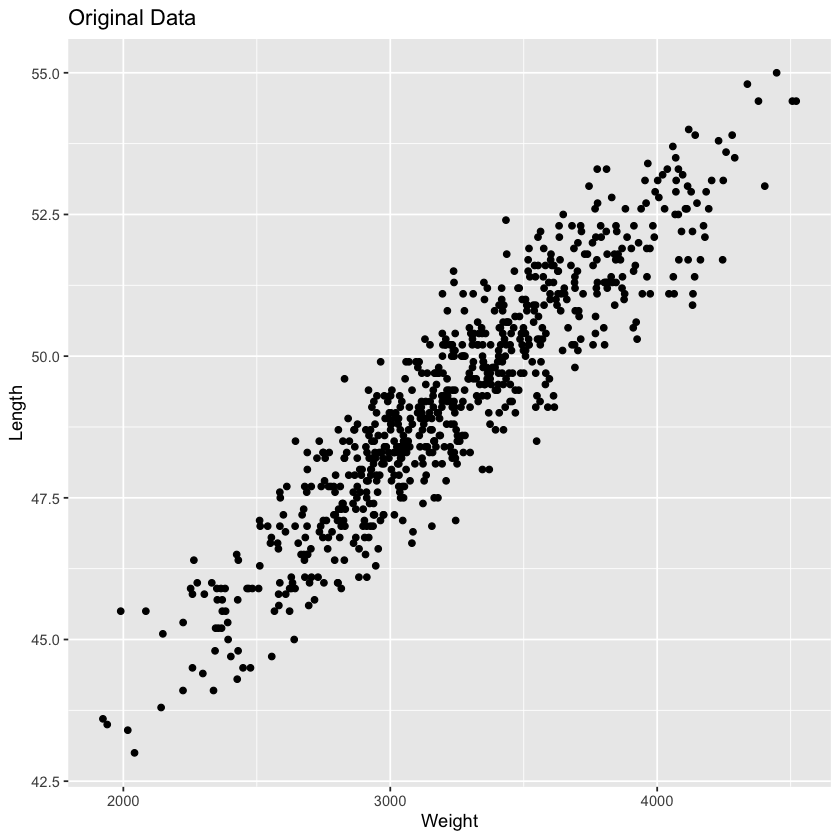

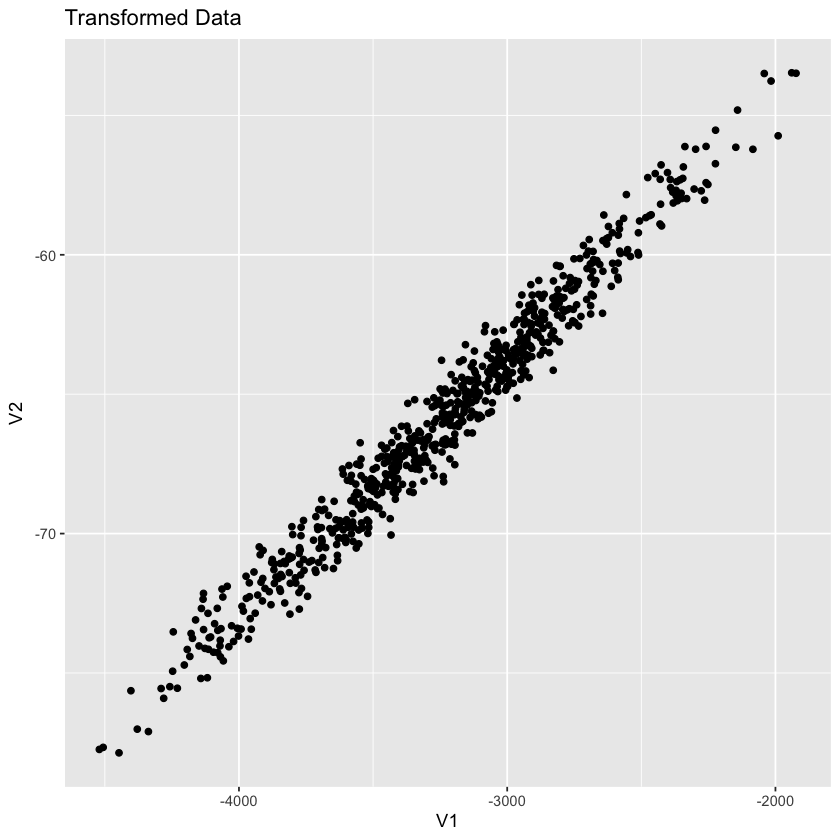

In [51]:
ggplot(data, aes(x=Weight, y=Length)) + geom_point() +ggtitle("Original Data")
transformed_data <- as.matrix(data[, c("Weight", "Length")]) %*% t(s_d$vectors)
transformed_data_df <- as.data.frame(transformed_data)
ggplot(transformed_data_df, aes(x = V1, y = V2)) + 
  geom_point() +
  ggtitle("Transformed Data")